<a href="https://colab.research.google.com/github/HakeemYB/DSAI_DataAnalytics/blob/master/ODproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

In [ ]:
!pip install torch

In [ ]:
!pip install ultralytics==8.0.20

In [ ]:
import torch
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.2/107.7 GB disk)


In [ ]:

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kHMsuk3AWLwks3bfSlta")
project = rf.workspace("nust-w6xwh").project("moduleproject-od")
dataset = project.version(1).download("yolov5")

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/ModuleProject-OD-1/data/data.yaml epochs=5 imgsz=100 plots=True


/content
100% 21.5M/21.5M [00:00<00:00, 175MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/ModuleProject-OD-1/data/data.yaml, epochs=5, patience=50, batch=16, imgsz=100, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fa

/content


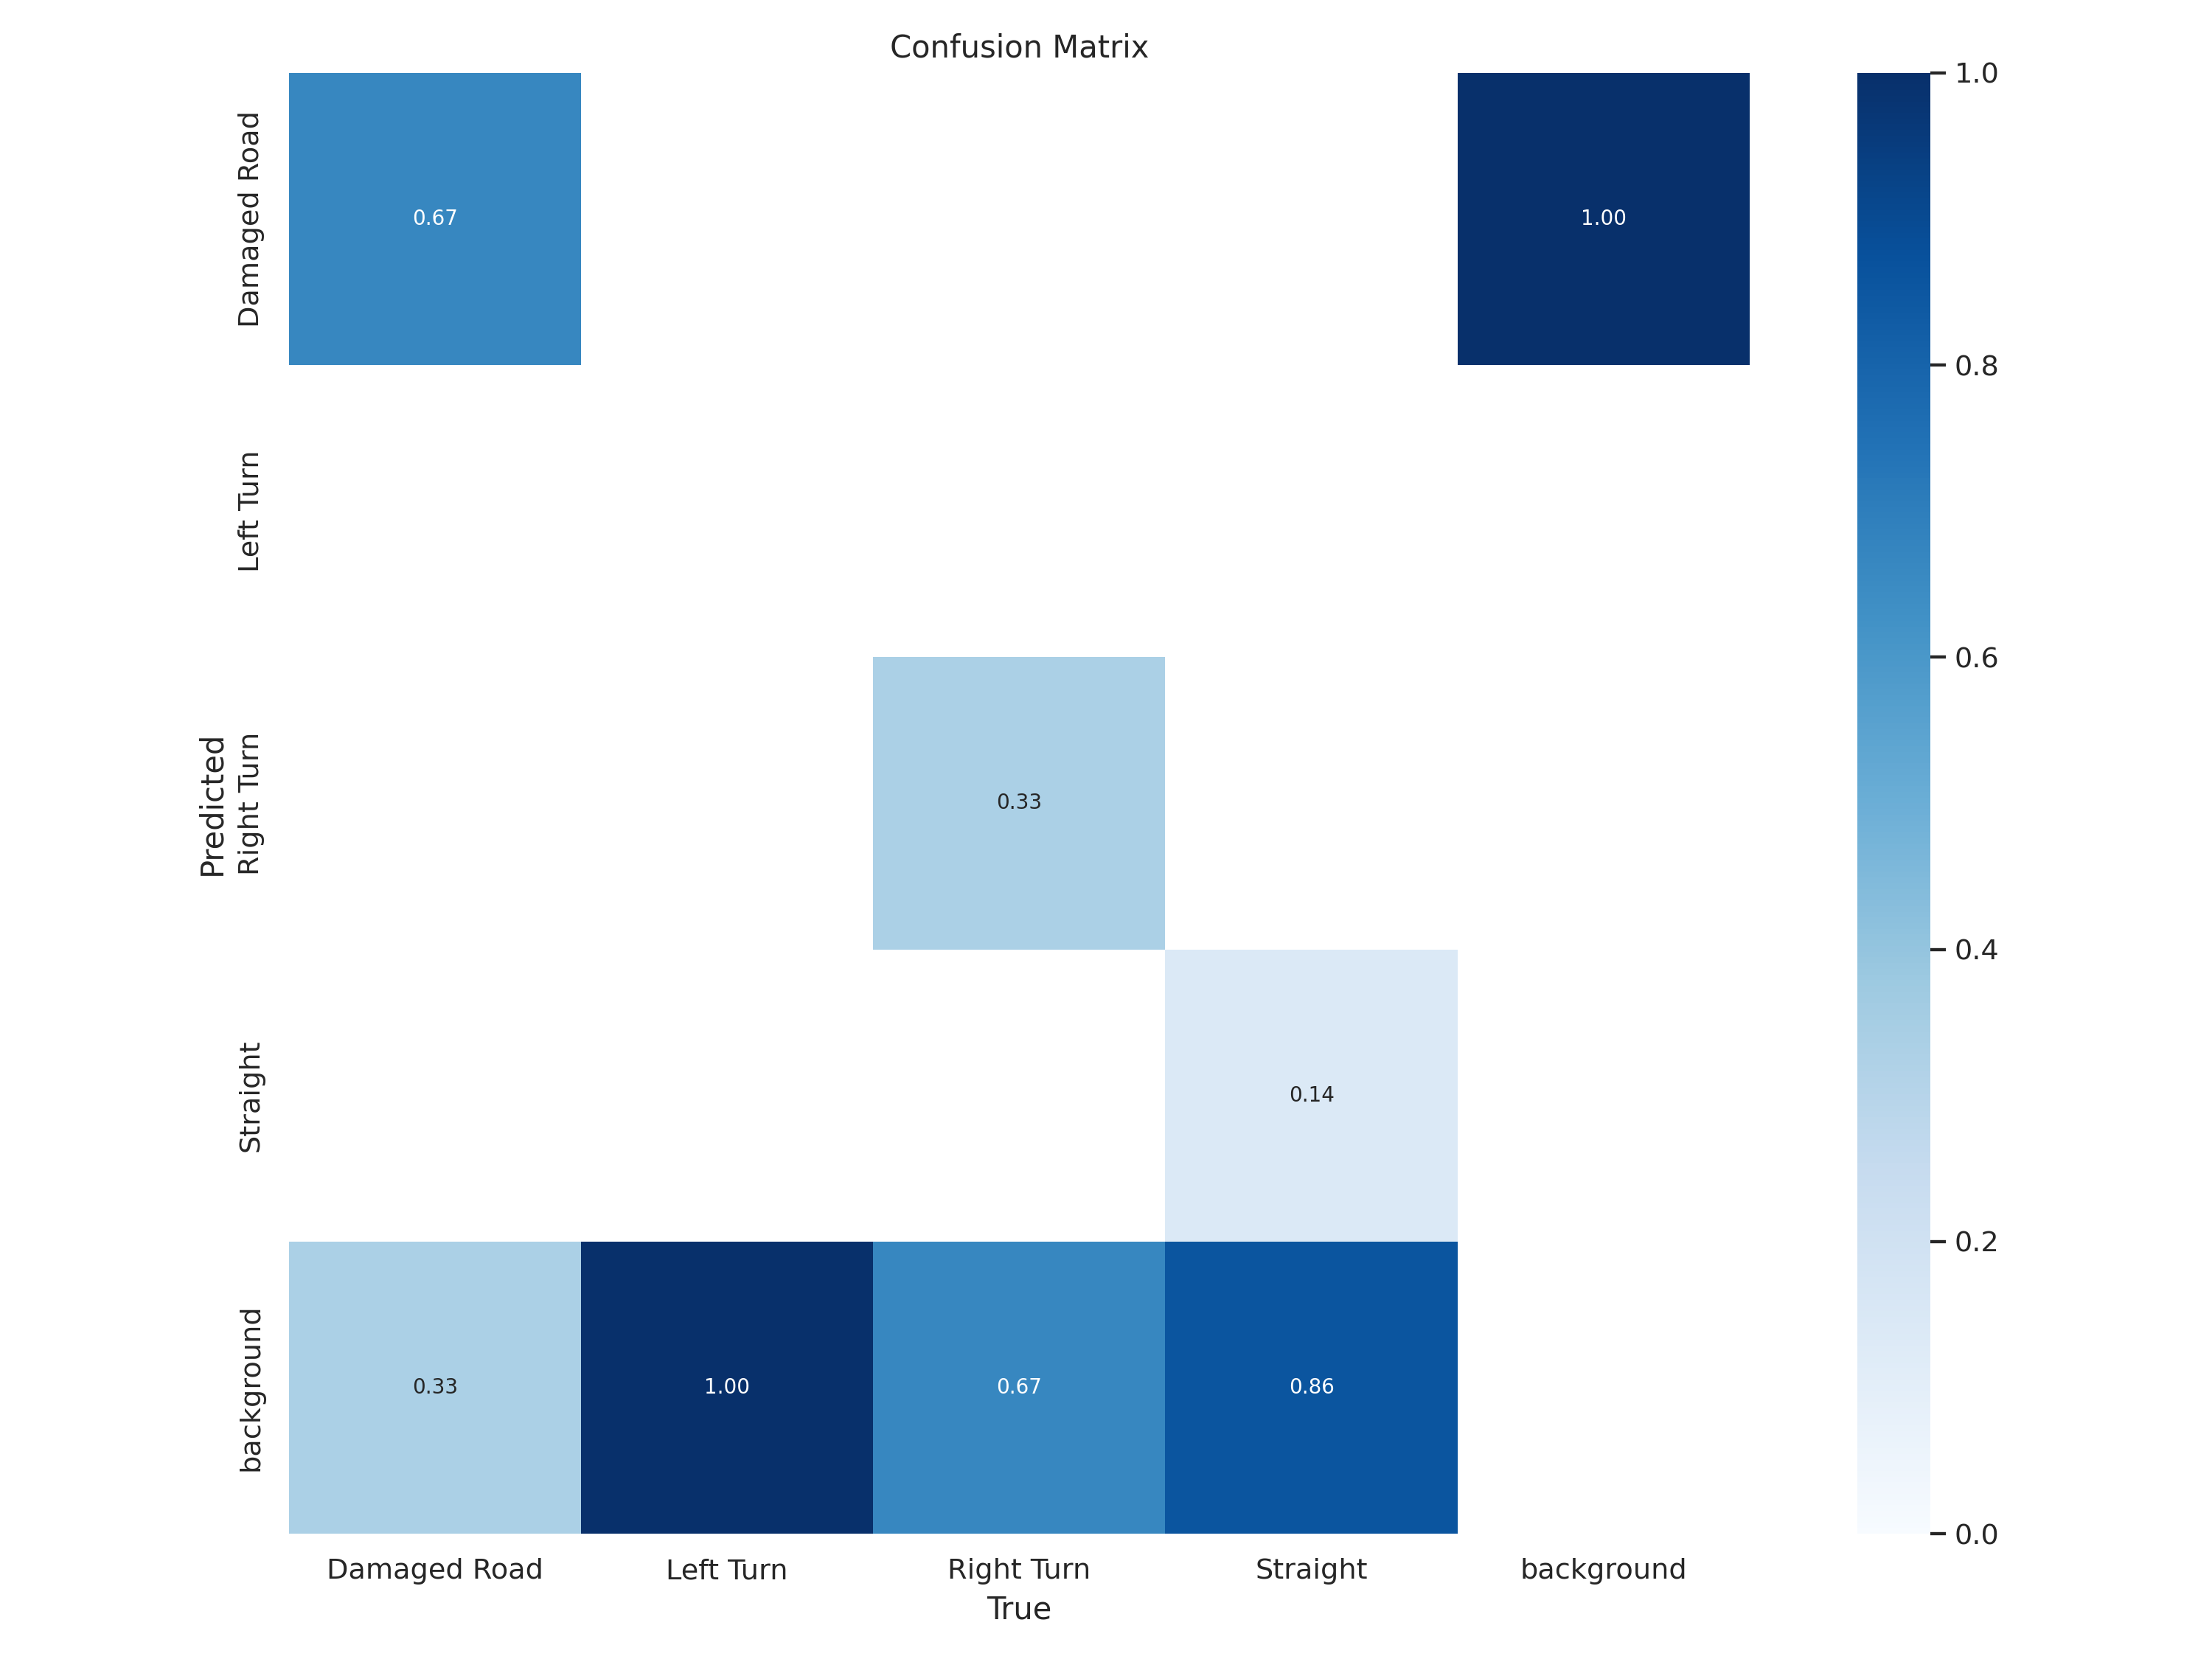

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


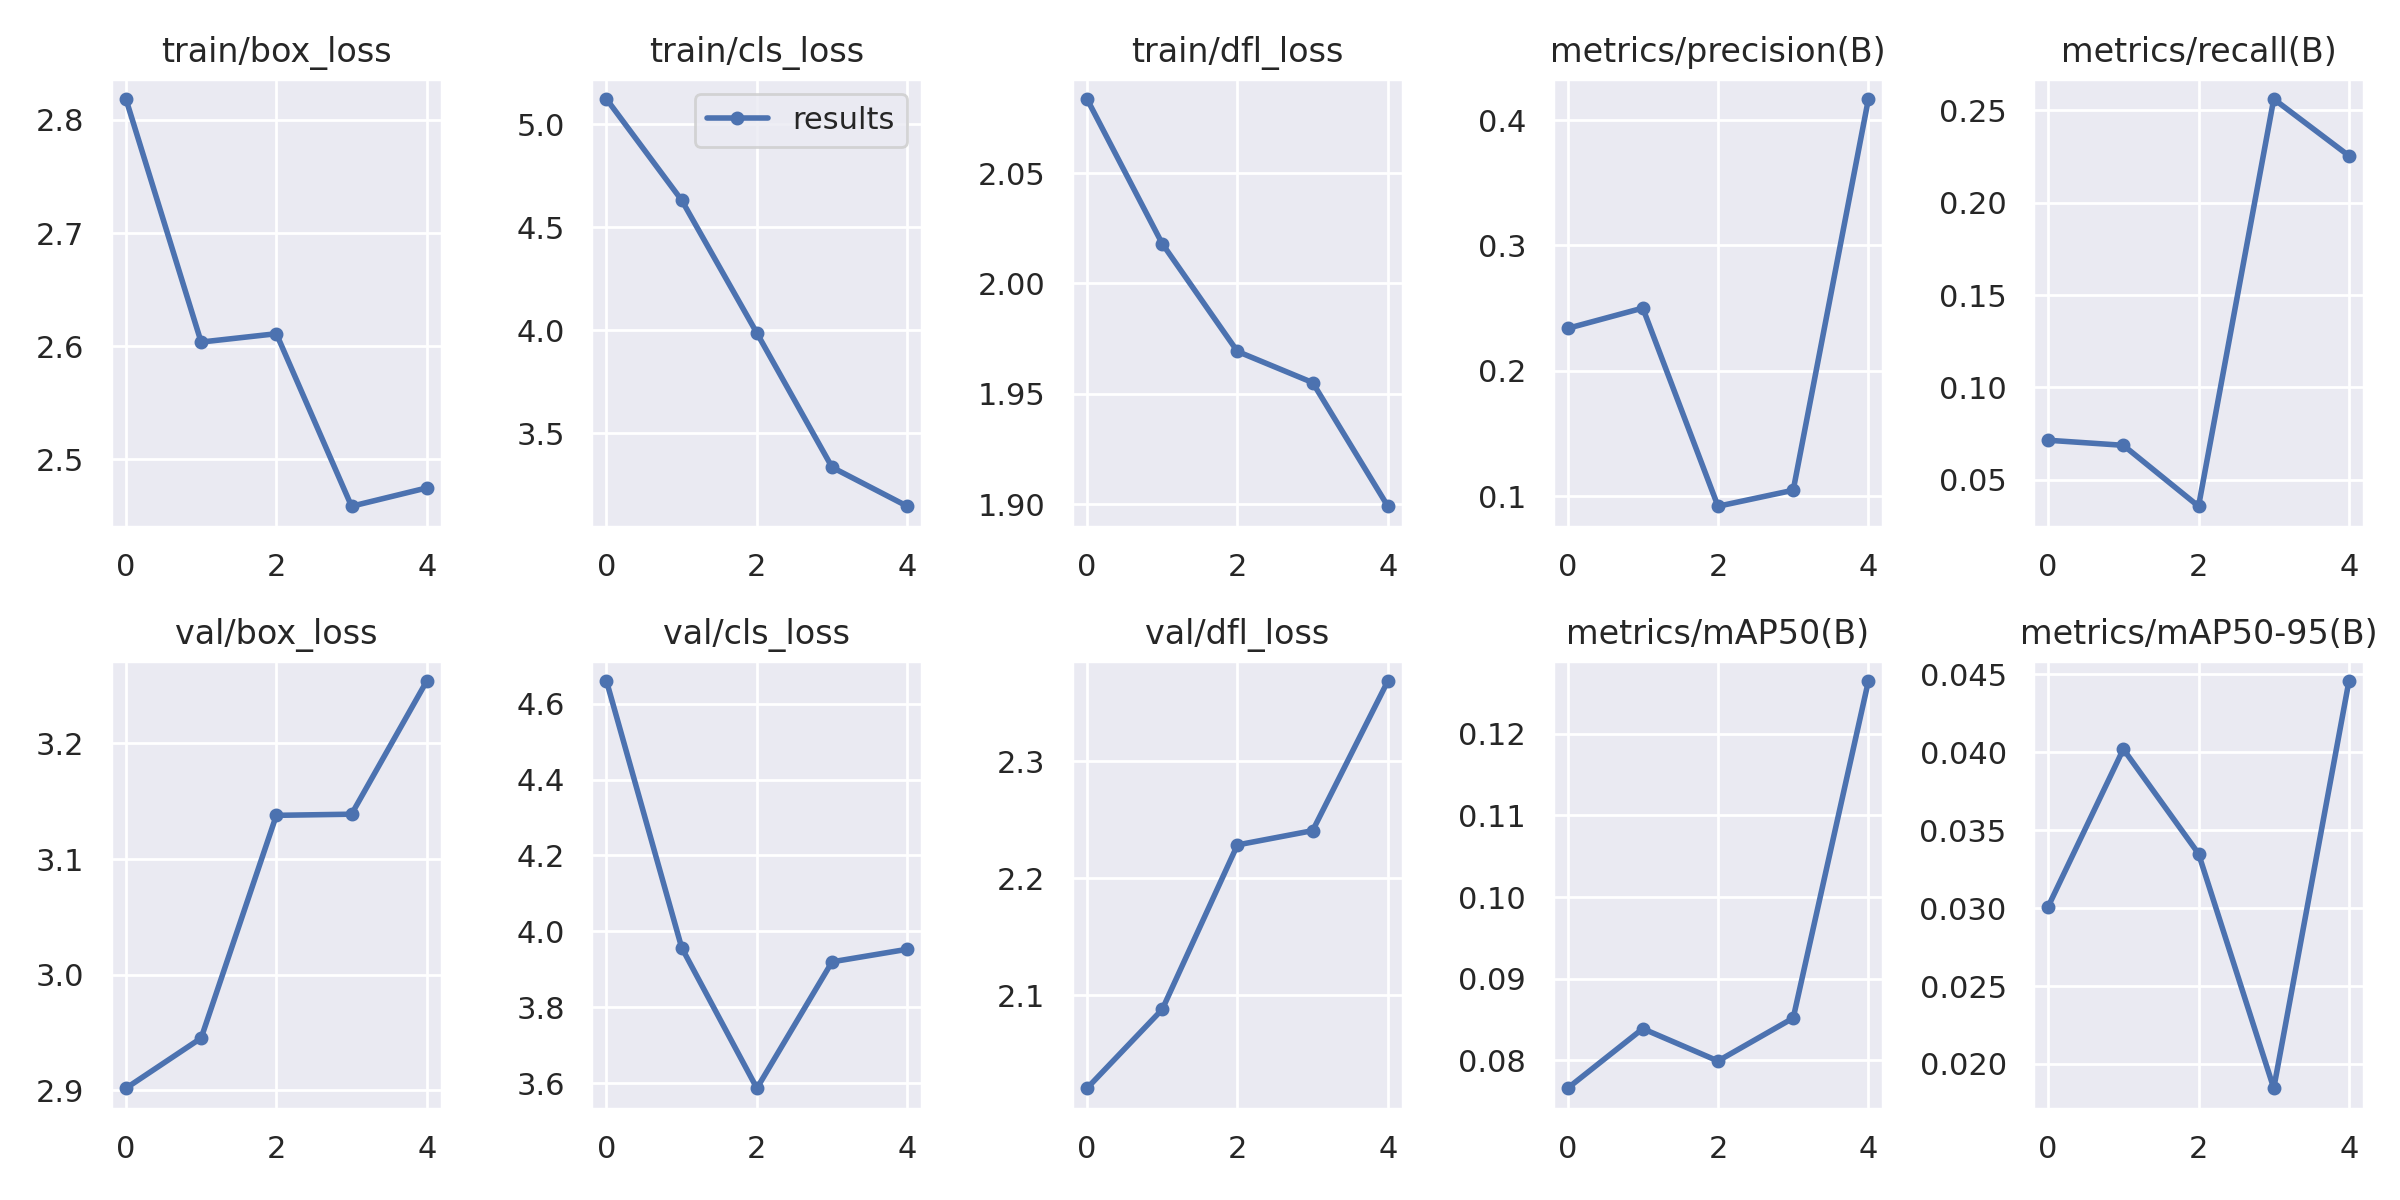

In [ ]:
from IPython.display import display, Image
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


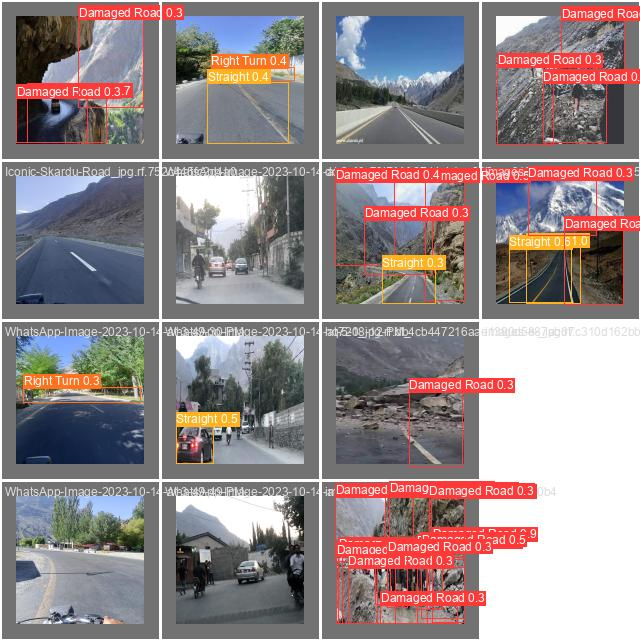

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1000)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/ModuleProject-OD-1/data/data.yaml

/content
2023-10-15 11:24:41.229351: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-15 11:24:42.193871: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/ModuleProject-OD-1/valid/labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100% 14/14 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.65it/s]
                   all         14         16      0.416      0.226      0.126     0.0446
          Damaged Road         14          3     0.0359     

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/ModuleProject-OD-1/test/images save=True

/content
2023-10-15 11:25:33.787908: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-15 11:25:34.667102: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/7 /content/datasets/ModuleProject-OD-1/test/images/WhatsApp-Image-2023-10-14-at-3-49-35-PM-1-_jpeg.rf.e80e94e7f6552622aee64ed9718159d9.jpg: 128x128 1 Damaged Road, 108.7ms
image 2/7 /content/datasets/ModuleProject-OD-1/test/images/WhatsApp-Image-2023-10-14-at-3-49-48-PM-1-_jpeg.rf.745b6db05ad4e03c30b2683a168d0f93.jpg: 128x128 1 Straight, 58.5ms
image 3/7 /content/datasets/ModuleProject-OD-1/test/imag

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")